In [11]:
import scanpy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data = sp.read_h5ad('../data/haniffa21.processed.h5ad', backed='r+')

In [3]:
data.X

<HDF5 sparse dataset: format 'csr', shape (647366, 24929), type '<f4'>

In [5]:
sp.pl.highest_expr_genes(data, n_top=20)

AttributeError: 'SparseDataset' object has no attribute 'sum'

In [ ]:
sp.pp.neighbors(data, n_neighbors=20, n_pcs=40)

/home/xv21903/miniconda3/envs/etcembly/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sp.tl.umap(data)

In [5]:
data.obs.sample_id.unique()

['MH9179824', 'newcastle65', 'MH9143327', 'MH9143326', 'MH9143325', ..., 'BGCV14_CV0050', 'BGCV15_CV0944', 'BGCV15_CV0176', 'BGCV15_CV0257', 'BGCV15_CV0231']
Length: 143
Categories (143, object): ['AP1', 'AP2', 'AP3', 'AP4', ..., 'newcastle49', 'newcastle59', 'newcastle65', 'newcastle74']

In [9]:
data

AnnData object with n_obs × n_vars = 647366 × 24929 backed at '../data/haniffa21.processed.h5ad'
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [10]:
data.obs.Swab_result

covid_index
AAACCTGAGAAACCTA-MH9179824    Positive
AAACCTGAGAGTAATC-MH9179824    Positive
AAACCTGAGAGTGAGA-MH9179824    Positive
AAACCTGAGGAATCGC-MH9179824    Positive
AAACCTGAGTGTTGAA-MH9179824    Positive
                                ...   
BGCV15_TTTGTCAAGGCGATAC-1     Positive
BGCV15_TTTGTCACAAGCCATT-1     Negative
BGCV15_TTTGTCACAGACACTT-1     Positive
BGCV15_TTTGTCAGTTACGGAG-1     Positive
BGCV15_TTTGTCATCGAATGGG-1     Positive
Name: Swab_result, Length: 647366, dtype: category
Categories (4, object): ['Healthy', 'LPS', 'Negative', 'Positive']

In [ ]:
sp.pl.umap(data, color='CST3')

In [ ]:
sp.pl.pca(data, color=data.var_names)

KeyError: 'Could not find key leiden in .var_names or .obs.columns.'

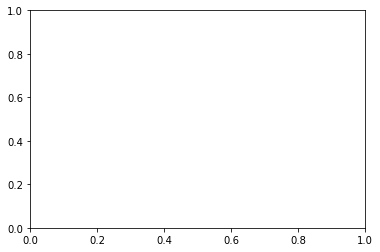

In [35]:
sp.pl.pca(data, color='leiden')

In [27]:
data.X

<HDF5 sparse dataset: format 'csr', shape (647366, 24929), type '<f4'>

In [33]:
data.X[0:100]

<100x24929 sparse matrix of type '<class 'numpy.float32'>'
	with 135477 stored elements in Compressed Sparse Row format>

In [4]:
sp.tl.leiden(data, key_added='clusters', resolution=0.5)

ValueError: You need to run `pp.neighbors` first to compute a neighborhood graph.

In [9]:
data.var_names[data.var_names=='']

Index(['LINC00115'], dtype='object')

In [8]:
data.var_names

Index(['MIR1302-2HG', 'AL627309.1', 'AL627309.3', 'AL627309.2', 'AL669831.2',
       'FAM87B', 'LINC00115', 'FAM41C', 'AL645608.2', 'SAMD11',
       ...
       'AB_CD101', 'AB_IL21R', 'AB_C5AR1', 'AB_HLA-F', 'AB_NLRP2',
       'AB_Podocalyxin', 'AB_GGT1', 'AB_c-Met', 'AB_LIGHT', 'AB_DR3'],
      dtype='object', length=24929)

In [13]:
subset_data = data.X[:100]

In [17]:
data.obs.shape

(647366, 23)

In [15]:
df = pd.DataFrame(subset_data.toarray(), columns=data.var_names)

In [16]:
df

,MIR1302-2HG,AL627309.1,AL627309.3,AL627309.2,AL669831.2,FAM87B,LINC00115,FAM41C,AL645608.2,SAMD11,...,AB_CD101,AB_IL21R,AB_C5AR1,AB_HLA-F,AB_NLRP2,AB_Podocalyxin,AB_GGT1,AB_c-Met,AB_LIGHT,AB_DR3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.625947,-0.085538,-0.232289,0.250930,-0.084674,-0.218926,-0.028993,0.034922,0.009421,-0.200650
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.610574,-0.050991,-0.079643,-0.316583,-0.108120,0.088621,0.181645,-0.180409,0.015938,-0.114951
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.228959,-0.146498,-0.020248,-0.190241,-0.094482,0.072296,0.232266,-0.275916,0.124552,-0.210458
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028613,-0.013865,-0.206373,-0.008390,-0.058759,-0.193011,0.235805,-0.173246,-0.265693,-0.475765
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.404391,-0.160965,0.044466,-0.176680,0.015990,-0.118262,0.041708,0.010647,-0.367037,-0.276078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133571,-0.033846,-0.083687,-0.049560,0.033964,0.133796,0.168827,-0.214416,0.061113,-0.148959
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.077058,-0.119536,0.034743,-0.135251,-0.118673,0.224196,0.083136,-0.300107,-0.024578,-0.359588
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.348600,0.050850,-0.220840,-0.010622,0.005956,-0.128296,-0.035273,-0.175478,-0.076040,-0.043073
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.156307,-0.409049,0.164359,-0.424764,-0.186337,0.001630,0.290948,-0.589620,-0.217180,-0.348070


In [3]:
sub_sample = sp.pp.subsample(data.X, n_obs=10000)

In [4]:
sub_data_obs = data.obs.iloc[sub_sample[1]]

# get the index
sample_index = sub_data_obs.index

In [5]:
df = pd.DataFrame(sub_sample[0].toarray(), columns=data.var_names, index=sample_index)

In [6]:
joined_df = df.join(sub_data_obs, on="covid_index")

In [11]:
joined_df[joined_df.initial_clustering.isin(['CD8', 'CD4'])]

,MIR1302-2HG,AL627309.1,AL627309.3,AL627309.2,AL669831.2,FAM87B,LINC00115,FAM41C,AL645608.2,SAMD11,...,Status,Smoker,Status_on_day_collection,Status_on_day_collection_summary,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome,patient_id
covid_index,,,,,,,,,,,,,,,,,,,,,
GACACGCGTTGTTTGG-MH8919282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Healthy,Not_known,Healthy,Healthy,Healthy,Ncl,nan,Healthy,Home,MH8919282
BGCV09_CATCAGAAGCACGCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Covid,Non-smoker,ITU_intubated,Critical,51,Cambridge,nan,Critical,unknown,CV0279
AATCGGTCATGCATGT-MH8919178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Healthy,Healthy,Healthy,Healthy,Healthy,Ncl,nan,Healthy,Home,MH8919178
GCTTCCACAGGCGATA-MH9143321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Covid,Non-smoker,Ward_noO2,Mild,6,Ncl,nan,Mild,Home,MH9143321
S15_CTAAGACTCAGCTCTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Covid,Smoker,Ward_noO2,Mild,15,Sanger,nan,nan,unknown,AP4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BGCV10_ATAGACCTCGCCGTGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Covid,Non-smoker,Ward_noO2,Mild,14,Cambridge,nan,Mild,Home,CV0160
BGCV14_CCTAAAGTCCTACAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Healthy,Not_known,Healthy,Healthy,Healthy,Cambridge,nan,Healthy,Home,CV0940
BGCV06_GTATCTTAGGCCCGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Covid,Non-smoker,Ward_O2,Moderate,11,Cambridge,nan,Moderate,Home,CV0234


In [16]:
joined_df[['CST3', 'NKG7', 'PPBP']]

,CST3,NKG7,PPBP
covid_index,,,
GACACGCGTTGTTTGG-MH8919282,0.000000,0.000000,0.0
GAAGCAGGTCTTGATG-MH9179826,4.523590,0.000000,0.0
BGCV09_CATCAGAAGCACGCCT-1,0.000000,0.000000,0.0
TTCTCAAAGGAATCGC-MH9143277,0.000000,0.000000,0.0
TGATTTCAGAATCTCC-MH9143271,4.177859,0.000000,0.0
...,...,...,...
AGGGAGTAGACCGGAT-MH9143424,0.000000,4.261095,0.0
BGCV02_GAGTCCGCACGGTGTC-1,0.000000,0.000000,0.0
GTAACGTAGAAGGACA-MH8919331,0.000000,0.000000,0.0


In [45]:
joined_df.to_csv('10000_sample')

In [43]:
joined_df.patient_id.unique()

['MH8919282', 'MH9179826', 'CV0279', 'MH9143277', 'MH9143271', ..., 'CV0201', 'MH8919228', 'MH8919233', 'MH8919276', 'MH8919277']
Length: 130
Categories (130, object): ['MH8919282', 'MH9179826', 'CV0279', 'MH9143277', ..., 'MH8919228', 'MH8919233', 'MH8919276', 'MH8919277']

In [38]:
joined_df.groupby(by='patient_id').count()

,MIR1302-2HG,AL627309.1,AL627309.3,AL627309.2,AL669831.2,FAM87B,LINC00115,FAM41C,AL645608.2,SAMD11,...,Swab_result,Status,Smoker,Status_on_day_collection,Status_on_day_collection_summary,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome
patient_id,,,,,,,,,,,,,,,,,,,,,
AP1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
AP2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AP3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
AP4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
AP5,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
newcastle21v2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
newcastle49,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
newcastle59,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


In [30]:
df.columns[df.columns.str.contains('TRAV')]

Index(['TRAV1-1', 'TRAV1-2', 'TRAV2', 'TRAV3', 'TRAV4', 'TRAV5', 'TRAV6',
       'TRAV7', 'TRAV8-1', 'TRAV9-1', 'TRAV10', 'TRAV11', 'TRAV12-1',
       'TRAV8-2', 'TRAV8-3', 'TRAV13-1', 'TRAV12-2', 'TRAV8-4', 'TRAV8-5',
       'TRAV13-2', 'TRAV14DV4', 'TRAV9-2', 'TRAV15', 'TRAV12-3', 'TRAV8-6',
       'TRAV16', 'TRAV17', 'TRAV18', 'TRAV19', 'TRAV20', 'TRAV21', 'TRAV22',
       'TRAV23DV6', 'TRAV24', 'TRAV25', 'TRAV26-1', 'TRAV8-7', 'TRAV27',
       'TRAV28', 'TRAV29DV5', 'TRAV30', 'TRAV31', 'TRAV33', 'TRAV26-2',
       'TRAV34', 'TRAV35', 'TRAV36DV7', 'TRAV37', 'TRAV38-1', 'TRAV38-2DV8',
       'TRAV39', 'TRAV40', 'TRAV41'],
      dtype='object')

In [31]:
df.columns[df.columns.str.contains('TRAJ')]

Index(['TRAJ58', 'TRAJ57', 'TRAJ56', 'TRAJ54', 'TRAJ53', 'TRAJ52', 'TRAJ50',
       'TRAJ49', 'TRAJ48', 'TRAJ47', 'TRAJ45', 'TRAJ44', 'TRAJ43', 'TRAJ42',
       'TRAJ41', 'TRAJ40', 'TRAJ39', 'TRAJ38', 'TRAJ37', 'TRAJ36', 'TRAJ35',
       'TRAJ34', 'TRAJ33', 'TRAJ32', 'TRAJ31', 'TRAJ30', 'TRAJ29', 'TRAJ28',
       'TRAJ27', 'TRAJ26', 'TRAJ24', 'TRAJ23', 'TRAJ22', 'TRAJ21', 'TRAJ20',
       'TRAJ18', 'TRAJ17', 'TRAJ16', 'TRAJ13', 'TRAJ12', 'TRAJ11', 'TRAJ10',
       'TRAJ9', 'TRAJ8', 'TRAJ7', 'TRAJ6', 'TRAJ5', 'TRAJ4', 'TRAJ3'],
      dtype='object')

In [33]:
df.columns[df.columns == 'TRAC']

Index(['TRAC'], dtype='object')

In [34]:
df.columns[df.columns.str.contains('TCRA')]

Index(['PTCRA'], dtype='object')

In [35]:
df.columns[df.columns.str.contains('TRDV')]

Index(['TRDMT1', 'TRDV1', 'TRDV2', 'TRDJ1', 'TRDJ2', 'TRDJ3', 'TRDC', 'TRDV3'], dtype='object')

In [38]:
df.columns[df.columns.str.contains('TRG')]

Index(['TRGC2', 'TRGJP2', 'TRGC1', 'TRGJP', 'TRGJP1', 'TRGV11', 'TRGVB',
       'TRGV10', 'TRGV9', 'TRGVA', 'TRGV8', 'TRGV7', 'TRGV6', 'TRG-AS1',
       'TRGV5P', 'TRGV5', 'TRGV4', 'TRGV3', 'TRGV2', 'TRGV1'],
      dtype='object')

In [39]:
df.columns[df.columns.str.contains('TRB')]

Index(['TRBV1', 'TRBV2', 'TRBV3-1', 'TRBV4-1', 'TRBV5-1', 'TRBV6-1', 'TRBV7-1',
       'TRBV4-2', 'TRBV6-2', 'TRBV7-2', 'TRBV6-4', 'TRBV7-3', 'TRBV8-2',
       'TRBV5-3', 'TRBV9', 'TRBV10-1', 'TRBV11-1', 'TRBV12-1', 'TRBV10-2',
       'TRBV11-2', 'TRBV12-2', 'TRBV6-5', 'TRBV7-4', 'TRBV5-4', 'TRBV6-6',
       'TRBV7-5', 'TRBV5-5', 'TRBV6-7', 'TRBV7-6', 'TRBV5-6', 'TRBV6-8',
       'TRBV7-7', 'TRBV5-7', 'TRBV7-9', 'TRBV13', 'TRBV10-3', 'TRBV11-3',
       'TRBV12-3', 'TRBV12-4', 'TRBV12-5', 'TRBV14', 'TRBV15', 'TRBV16',
       'TRBV17', 'TRBV18', 'TRBV19', 'TRBV20-1', 'TRBV21-1', 'TRBV22-1',
       'TRBV23-1', 'TRBV24-1', 'TRBV25-1', 'TRBVA', 'TRBVB', 'TRBV27',
       'TRBV28', 'TRBV29-1', 'TRBJ1-1', 'TRBJ1-2', 'TRBJ1-3', 'TRBJ1-4',
       'TRBJ1-5', 'TRBJ1-6', 'TRBC1', 'TRBJ2-1', 'TRBJ2-2', 'TRBJ2-3',
       'TRBJ2-4', 'TRBJ2-5', 'TRBJ2-6', 'TRBJ2-7', 'TRBC2', 'TRBV30',
       'TRBV20OR9-2', 'TRBV21OR9-2', 'TRBV25OR9-2', 'STRBP', 'CTRB1'],
      dtype='object')

In [47]:
t_cells = df.columns[df.columns.str.contains('TRAV|TRB|TRG|TRDV|TCRA|TRAJ')]

In [48]:
df.loc[:, t_cells]

,PTCRA,TRGC2,TRGJP2,TRGC1,TRGJP,TRGJP1,TRGV11,TRGVB,TRGV10,TRGV9,...,TRAJ11,TRAJ10,TRAJ9,TRAJ8,TRAJ7,TRAJ6,TRAJ5,TRAJ4,TRAJ3,CTRB1
covid_index,,,,,,,,,,,,,,,,,,,,,
GACACGCGTTGTTTGG-MH8919282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAAGCAGGTCTTGATG-MH9179826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BGCV09_CATCAGAAGCACGCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTCTCAAAGGAATCGC-MH9143277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGATTTCAGAATCTCC-MH9143271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGGGAGTAGACCGGAT-MH9143424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BGCV02_GAGTCCGCACGGTGTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTAACGTAGAAGGACA-MH8919331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# only t cells
t_cells = ['TRAV1-1', 'TRAV1-2', 'TRAV2', 'TRAV3', 'TRAV4', 'TRAV5', 'TRAV6',
       'TRAV7', 'TRAV8-1', 'TRAV9-1', 'TRAV10', 'TRAV11', 'TRAV12-1',
       'TRAV8-2', 'TRAV8-3', 'TRAV13-1', 'TRAV12-2', 'TRAV8-4', 'TRAV8-5',
       'TRAV13-2', 'TRAV14DV4', 'TRAV9-2', 'TRAV15', 'TRAV12-3', 'TRAV8-6',
       'TRAV16', 'TRAV17', 'TRAV18', 'TRAV19', 'TRAV20', 'TRAV21', 'TRAV22',
       'TRAV23DV6', 'TRAV24', 'TRAV25', 'TRAV26-1', 'TRAV8-7', 'TRAV27',
       'TRAV28', 'TRAV29DV5', 'TRAV30', 'TRAV31', 'TRAV33', 'TRAV26-2',
       'TRAV34', 'TRAV35', 'TRAV36DV7', 'TRAV37', 'TRAV38-1', 'TRAV38-2DV8',
       'TRAV39', 'TRAV40', 'TRAV41']

data.X[:, data.var_names.isin(t_cells)]

MemoryError: Unable to allocate 3.61 GiB for an array with shape (968620608,) and data type float32

In [1]:
data

NameError: name 'data' is not defined

In [4]:
sampled_data = pd.read_csv('10000_sample')

/home/xv21903/miniconda3/envs/etcembly/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3098: DtypeWarning: Columns (24949) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
mean_data = sampled_data.groupby(by='Status').mean()

 ...]

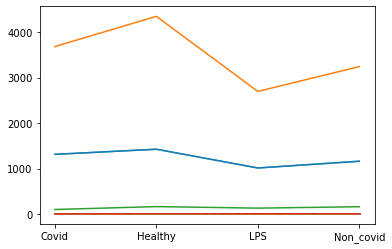